# Target Pattern in Top 4 most affected countries by terrorist attacks

In [1]:
# Importing the required packages
import os
import glob
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Creating the path to read the input file
home_path = os.path.expanduser("~")
data_path = home_path+"\\final\\Data\\*"

In [3]:
# Looping through each filename in above path and selecting the required file
for file in glob.glob(data_path):
    with open(file, errors='ignore') as source:
        ana_5_data=pd.read_csv(source, low_memory=False, encoding='ISO-8859-1')
ana_5_data.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,2.000000e+11,2001,1,0,"January 8-9, 2001",0,NaN,45,Colombia,3,...,Sources imply that the attack may have taken p...,"""Twenty murdered in attacks across Colombia at...","""Colombia violence leaves 35 dead,"" Agence Fra...",NaN,UMD Schmid 2012,-9,-9,0,-9,NaN
1,2.000000e+11,2001,1,1,NaN,0,NaN,228,Yemen,10,...,NaN,âBomb Blast Outside Yemeni News Agency Offic...,âAuthorities Arrest Suspects in Aden Bombing...,NaN,CETIS,-9,-9,0,-9,NaN


In [4]:
# Creating a dataframe containing needed columns
data = ana_5_data[['gname', 'motive', 'attacktype1_txt', 'country_txt', 'region_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1']]

# Replacing NAN with 0 for motive column
data['motive'] = data['motive'].fillna(0).astype(str)

# Creating dataframes to store top 4 terrorist hit countries and storing target type in each of these country
data_iraq=data[(data.country_txt == 'Iraq') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_afghanistan=data[(data.country_txt == 'Afghanistan') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_nigeria=data[(data.country_txt == 'Nigeria') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()
data_syria=data[(data.country_txt == 'Syria') & (data.target1 != 'Unknown')].groupby(['country_txt', 'target1']).size().sort_values(ascending=False).head(10).to_frame(name = 'Attacks').reset_index()


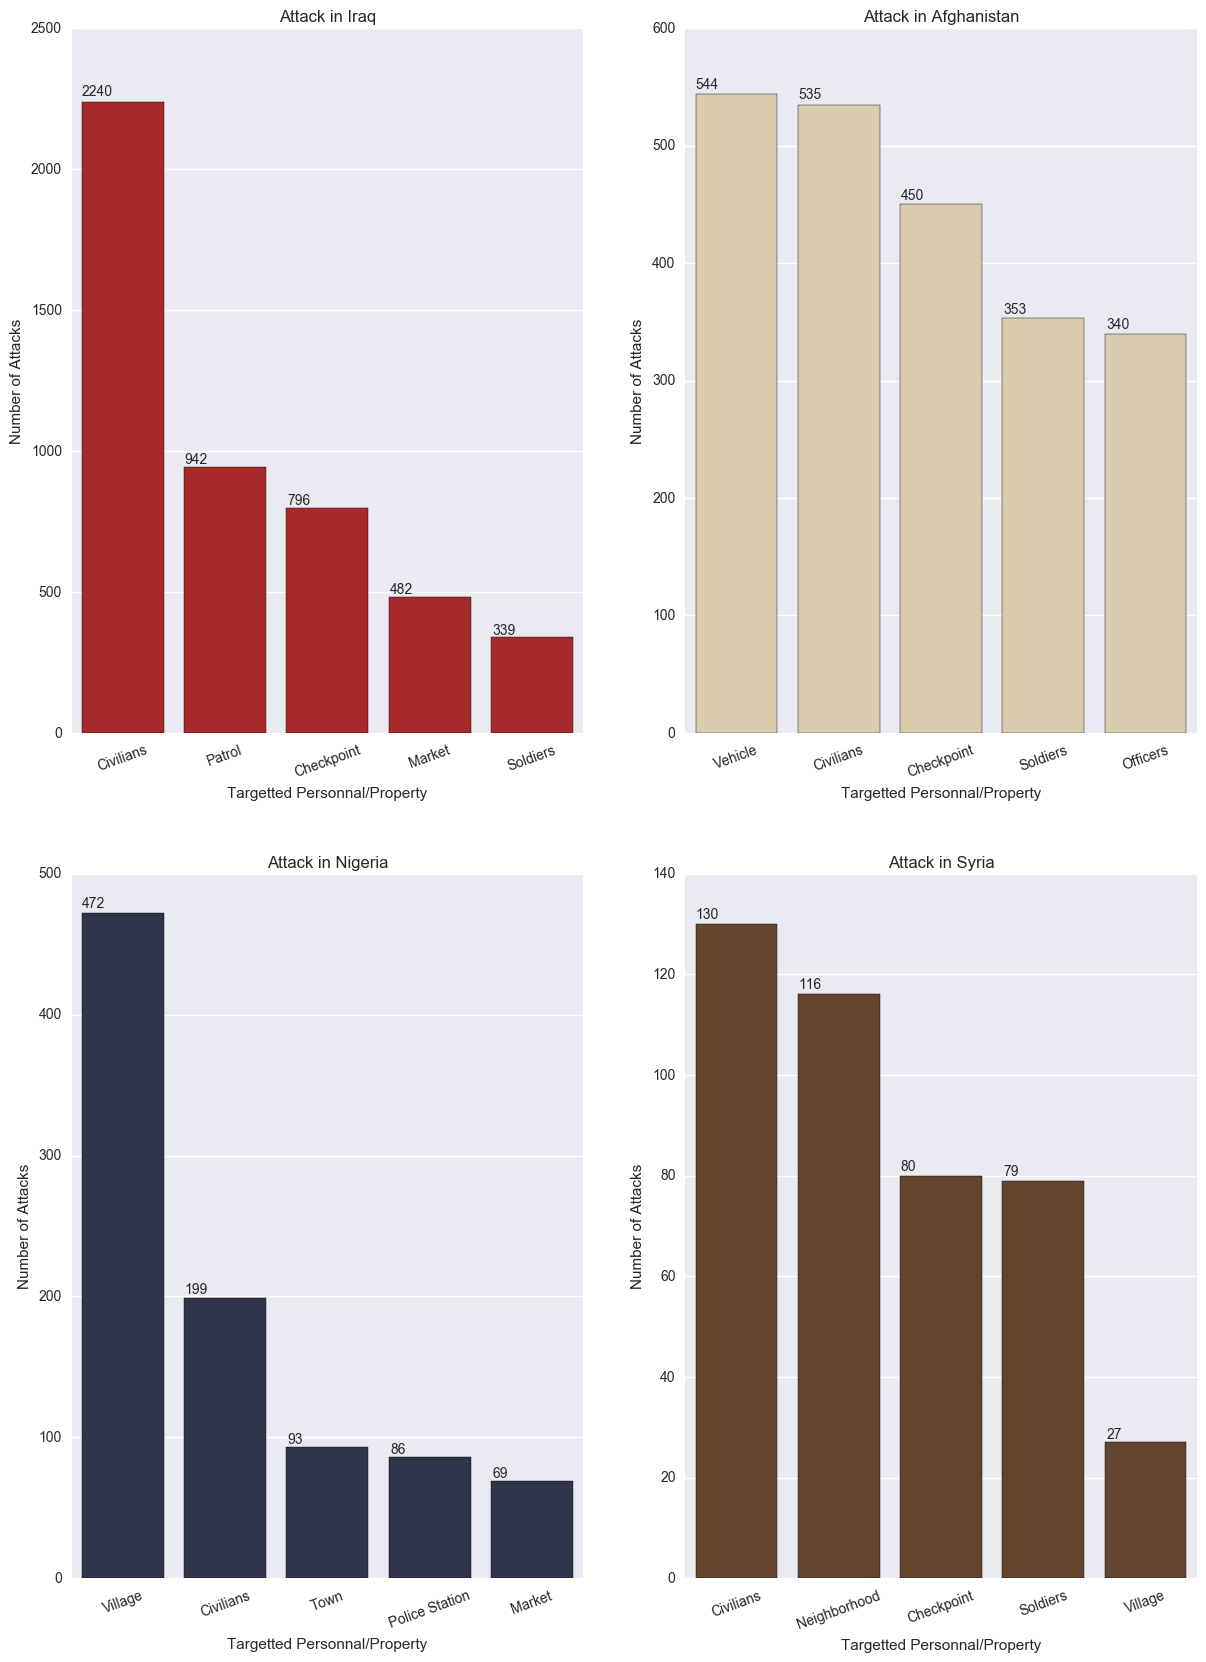

In [5]:
# Creating the subplots
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Plotting the number of attacks for each targetted Personnal/Property in Iraq
ax1 = sns.barplot(x="target1", y="Attacks", data=data_iraq.head(5), ax=ax1, color="#bb1515") 
ax1.set_title('Attack in Iraq')
ax1.set_xlabel("Targetted Personnal/Property")
ax1.set_ylabel("Number of Attacks")

# Plotting the number of attacks for each targetted Personnal/Property in Afghanistan
ax2 = sns.barplot(x="target1", y="Attacks", data=data_afghanistan.head(5), ax=ax2, color="#e0cda7") 
ax2.set_title('Attack in Afghanistan')
ax2.set_xlabel("Targetted Personnal/Property")
ax2.set_ylabel("Number of Attacks")

# Plotting the number of attacks for each targetted Personnal/Property in Nigeria
ax3 = sns.barplot(x="target1", y="Attacks", data=data_nigeria.head(5), ax=ax3, color="#2a334f") 
ax3.set_title('Attack in Nigeria')
ax3.set_xlabel("Targetted Personnal/Property")
ax3.set_ylabel("Number of Attacks")

# Plotting the number of attacks for each targetted Personnal/Property in Syria
ax4 = sns.barplot(x="target1", y="Attacks", data=data_syria.head(5), ax=ax4, color="#6b4423") 
ax4.set_title('Attack in Syria')
ax4.set_xlabel("Targetted Personnal/Property")
ax4.set_ylabel("Number of Attacks")

# Adjusting the graph
plt.subplots_adjust(right=2, top=4)

# Rotating the values on x axis to avoid overlapping
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)

# Displaying attack count on top of each bar    
for ax in fig.axes:
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')
        
# Saving the plot in png format
plt.savefig('ana_5\\top4propertyattack.png', bbox_inches='tight')

## *Conclusion:*
### *It can be seen from the above graphs that:*
- The top four most affected countries by terrorist attacks as per wikipedia has more percentage of attacks in 
  normal areas as compared to the attacks on government or militry infrastructure.
- This pattern clearly bifurcate with the terrorist motives to protest against the wrongdoing that 
  they have suffered from the political or militry establishment in a country.
- They are attacking and killing normal innocent people in the name of Jihad.
- These attacks not only make a country poorer but also injest the fearsome feeling of being unsafe.